# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

In [5]:
brsus = pd.read_csv('sinasc_RO_2019.csv')
brsus.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [19]:
def categoriza_apgar5(apgar5):
    if 0 <= apgar5 <= 3:
        return 'asfixia grave'
    elif 4 <= apgar5 <= 5:
        return 'asfixia moderada'
    elif 6 <= apgar5 <= 7:
        return 'asfixia leve'
    else:
        return 'normal'

brsus['APGAR5_cat'] = brsus['APGAR5'].apply(categoriza_apgar5)
# Ver as primeiras 5 linhas
brsus[['APGAR5', 'APGAR5_cat']].head()

,APGAR5,APGAR5_cat
0,10.0,normal
1,9.0,normal
2,10.0,normal
3,10.0,normal
4,10.0,normal


In [21]:
valores_apgar5 = brsus['APGAR5'].unique()

# Valores únicos na nova coluna APGAR5_cat
valores_apgar5_cat = brsus['APGAR5_cat'].unique()

# Exibir os resultados
print("Valores únicos em APGAR5:", valores_apgar5)
print("Valores únicos em APGAR5_cat:", valores_apgar5_cat)

Valores únicos em APGAR5: [10.  9.  7.  0.  8.  4.  3.  6.  5. nan  2.  1.]
Valores únicos em APGAR5_cat: ['normal' 'asfixia leve' 'asfixia grave' 'asfixia moderada']


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

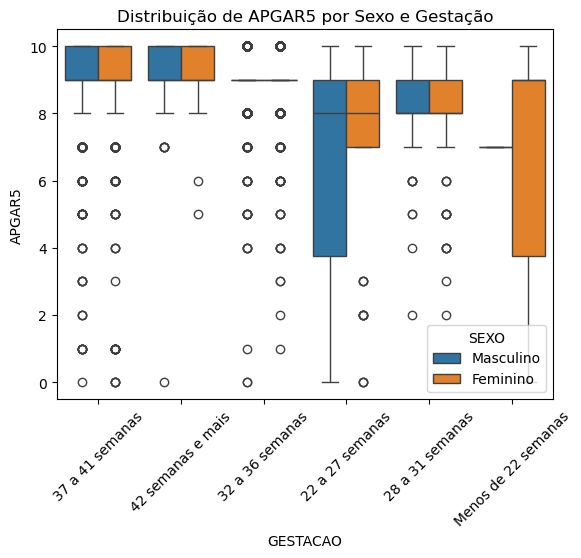

In [33]:
sns.boxplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=brsus)
plt.title('Distribuição de APGAR5 por Sexo e Gestação')
plt.xticks(rotation=45)  # Rotaciona os rótulos em 45 graus
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [25]:
tabela_cruzada = pd.crosstab(brsus['GESTACAO'], brsus['APGAR5_cat'])
print(tabela_cruzada)

APGAR5_cat           asfixia grave  asfixia leve  asfixia moderada  normal
GESTACAO                                                                  
22 a 27 semanas                 21            12                 1      52
28 a 31 semanas                  3            18                12     132
32 a 36 semanas                  8            73                19    2149
37 a 41 semanas                 33           196                28   22332
42 semanas e mais                1             6                 1     692
Menos de 22 semanas              2             1                 0       4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [27]:
percentuais = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0)
print(percentuais)

APGAR5_cat           asfixia grave  asfixia leve  asfixia moderada    normal
GESTACAO                                                                    
22 a 27 semanas           0.244186      0.139535          0.011628  0.604651
28 a 31 semanas           0.018182      0.109091          0.072727  0.800000
32 a 36 semanas           0.003557      0.032459          0.008448  0.955536
37 a 41 semanas           0.001461      0.008677          0.001240  0.988623
42 semanas e mais         0.001429      0.008571          0.001429  0.988571
Menos de 22 semanas       0.285714      0.142857          0.000000  0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

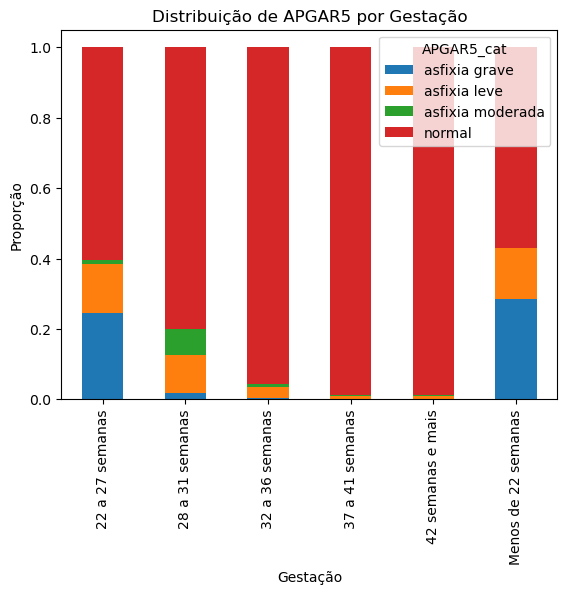

In [29]:
percentuais.plot(kind='bar', stacked=True)
plt.title('Distribuição de APGAR5 por Gestação')
plt.xlabel('Gestação')
plt.ylabel('Proporção')
plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

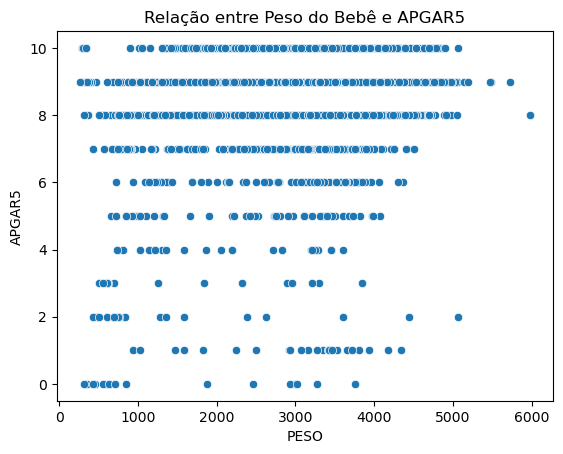

In [31]:
sns.scatterplot(x='PESO', y='APGAR5', data=brsus)
plt.title('Relação entre Peso do Bebê e APGAR5')
plt.show()

# Outras opções:
# - Boxplot do APGAR5 para diferentes faixas de peso
# - Correlação de Pearson entre as variáveis
# - Modelo de regressão linear